In [26]:
from os.path import join
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_squared_error

# Data

In [27]:
experiment = 'december'
fruit = 'orange'
data_folder = join('..', 'data', 'segmented_data', experiment, fruit)
train_data = pd.read_csv(join(data_folder,'good_standardized_sampled_train.csv'))
test_data = pd.read_csv(join(data_folder,'good_standardized_sampled_test.csv'))
#train_data

# ML

0.8785254118374101


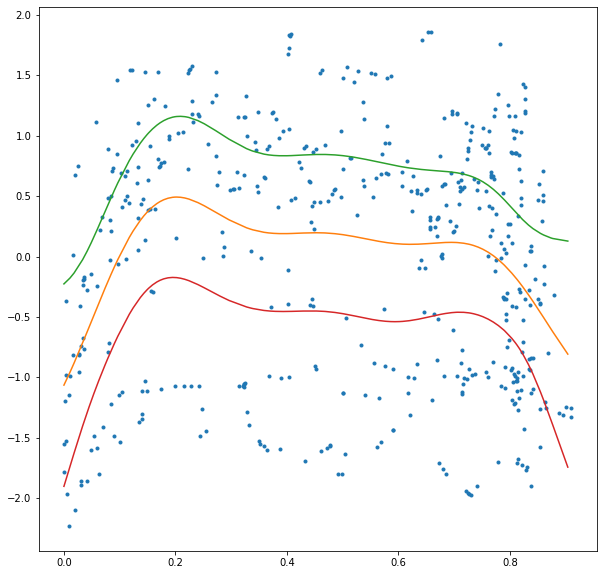

In [31]:
X = np.atleast_2d(train_data['displacement'].values).T
X_test = np.atleast_2d(test_data['displacement'].values).T
y = np.atleast_2d(train_data['force_x'].values).T.ravel()

rbf_kernel = RBF(0.1352)

gpr = GaussianProcessRegressor(kernel=rbf_kernel,
                               normalize_y=False,
                               alpha=1/np.sqrt(2),
                               n_restarts_optimizer=1,
                               random_state=42)

gpr.fit(X, y)
gpr.score(X, y)
print(mean_squared_error(y, gpr.predict(X)))
res, std = gpr.predict(X_test, return_std=True)
plt.plot(X, y, '.')
plt.plot(X_test, res)
plt.plot(X_test, res + 2*np.sqrt(std))
plt.plot(X_test, res - 2*np.sqrt(std))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()